In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import Lasso
import warnings
import seaborn as sns

In [44]:
spot_prices = pd.read_csv("spotpriser.csv").set_index("time")
consumption = pd.read_csv("consumption_temp_with_flags.csv").set_index("time")

oslo_consumption = consumption[consumption["location"] == "oslo"]
oslo_consumption = oslo_consumption.merge(spot_prices["oslo"], left_index=True, right_index=True, how="left")
oslo_consumption=oslo_consumption.drop(['location'],axis=1).rename(columns={'oslo':'spot_price'})

stavanger_consumption = consumption[consumption["location"] == "stavanger"]
stavanger_consumption = stavanger_consumption.merge(spot_prices["stavanger"], left_index=True, right_index=True, how="left")
stavanger_consumption=stavanger_consumption.drop(['location'],axis=1).rename(columns={'stavanger':'spot_price'})

trondheim_consumption = consumption[consumption["location"] == "trondheim"]
trondheim_consumption = trondheim_consumption.merge(spot_prices["trondheim"], left_index=True, right_index=True, how="left")
trondheim_consumption=trondheim_consumption.drop(['location'],axis=1).rename(columns={'trondheim':'spot_price'})

tromso_consumption = consumption[consumption["location"] == "tromsø"]
tromso_consumption = tromso_consumption.merge(spot_prices["tromsø"], left_index=True, right_index=True, how="left")
tromso_consumption=tromso_consumption.drop(['location'],axis=1).rename(columns={'tromsø':'spot_price'})

bergen_consumption = consumption[consumption["location"] == "bergen"]
bergen_consumption = bergen_consumption.merge(spot_prices["bergen"], left_index=True, right_index=True, how="left")
bergen_consumption=bergen_consumption.drop(['location'],axis=1).rename(columns={'bergen':'spot_price'})

helsingfors_consumption = consumption[consumption["location"] == "helsingfors"]
helsingfors_consumption = helsingfors_consumption.merge(spot_prices["bergen"], left_index=True, right_index=True, how="left")
helsingfors_consumption=helsingfors_consumption.drop(['location'],axis=1)



    

<Figure size 1000x600 with 0 Axes>

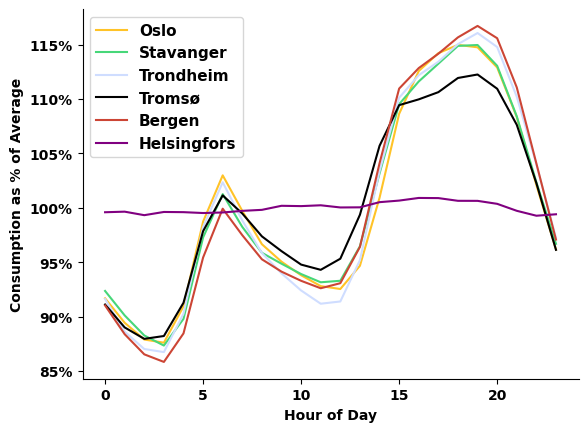

In [45]:
DF_STRINGS = ["Oslo","Stavanger","Trondheim","Tromsø","Bergen", 'Helsingfors']
DFS = [oslo_consumption,stavanger_consumption,trondheim_consumption,tromso_consumption,bergen_consumption, helsingfors_consumption]
Colors = ['#FFC328', '#47D779', '#CFDDFF', 'black', '#CC4535', 'purple']
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
for i in range(len(DFS)):
    data = DFS[i][(DFS[i]['is_weekend'] == 0) & (DFS[i]['is_holiday'] == 0)]
    data.index = pd.to_datetime(data.index)
    plot_df = data.groupby(data.index.hour).mean()
    ax.plot(plot_df.consumption/plot_df.consumption.mean(), label=DF_STRINGS[i], color=Colors[i], linewidth=1.5)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
    plt.xlabel('Hour of Day', fontweight='bold')
    plt.ylabel(f'Consumption as % of Average', fontweight='bold')
    legend = plt.legend(fontsize='11')
    for text in legend.get_texts():
        text.set_fontweight('bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    i += 1
plt.show()

<Figure size 1000x600 with 0 Axes>

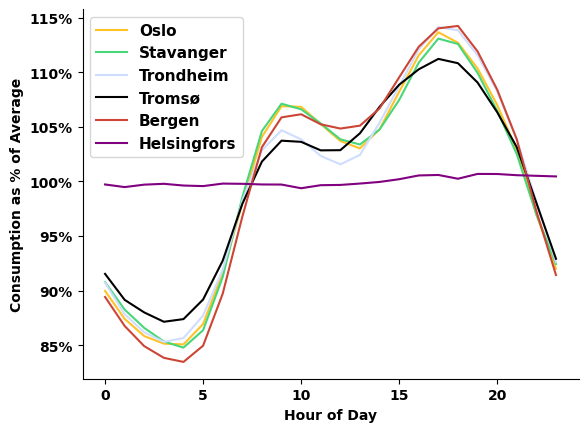

In [46]:
DF_STRINGS = ["Oslo","Stavanger","Trondheim","Tromsø","Bergen", 'Helsingfors']
DFS = [oslo_consumption,stavanger_consumption,trondheim_consumption,tromso_consumption,bergen_consumption, helsingfors_consumption]
Colors = ['#FFC328', '#47D779', '#CFDDFF', 'black', '#CC4535', 'purple']
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
for i in range(len(DFS)):
    data = DFS[i][(DFS[i]['is_weekend'] == 1) & (DFS[i]['is_holiday'] == 0)]
    data.index = pd.to_datetime(data.index)
    plot_df = data.groupby(data.index.hour).mean()
    ax.plot(plot_df.consumption/plot_df.consumption.mean(), label=DF_STRINGS[i], color=Colors[i], linewidth=1.5)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
    plt.xlabel('Hour of Day', fontweight='bold')
    plt.ylabel(f'Consumption as % of Average', fontweight='bold')
    legend = plt.legend(fontsize='11')
    for text in legend.get_texts():
        text.set_fontweight('bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    i += 1
plt.show()

<Figure size 1000x600 with 0 Axes>

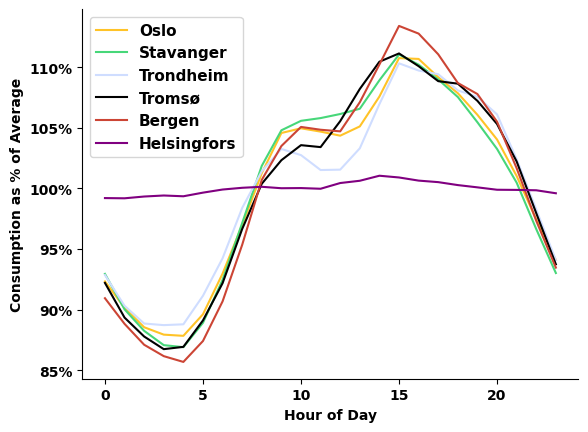

In [47]:
DF_STRINGS = ["Oslo","Stavanger","Trondheim","Tromsø","Bergen", 'Helsingfors']
DFS = [oslo_consumption,stavanger_consumption,trondheim_consumption,tromso_consumption,bergen_consumption, helsingfors_consumption]
Colors = ['#FFC328', '#47D779', '#CFDDFF', 'black', '#CC4535', 'purple']
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
for i in range(len(DFS)):
    data = DFS[i][DFS[i]['is_holiday'] == 1]
    data.index = pd.to_datetime(data.index)
    plot_df = data.groupby(data.index.hour).mean()
    ax.plot(plot_df.consumption/plot_df.consumption.mean(), label=DF_STRINGS[i], color=Colors[i], linewidth=1.5)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
    plt.xlabel('Hour of Day', fontweight='bold')
    plt.ylabel(f'Consumption as % of Average', fontweight='bold')
    legend = plt.legend(fontsize='11')
    for text in legend.get_texts():
        text.set_fontweight('bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    i += 1
plt.show()

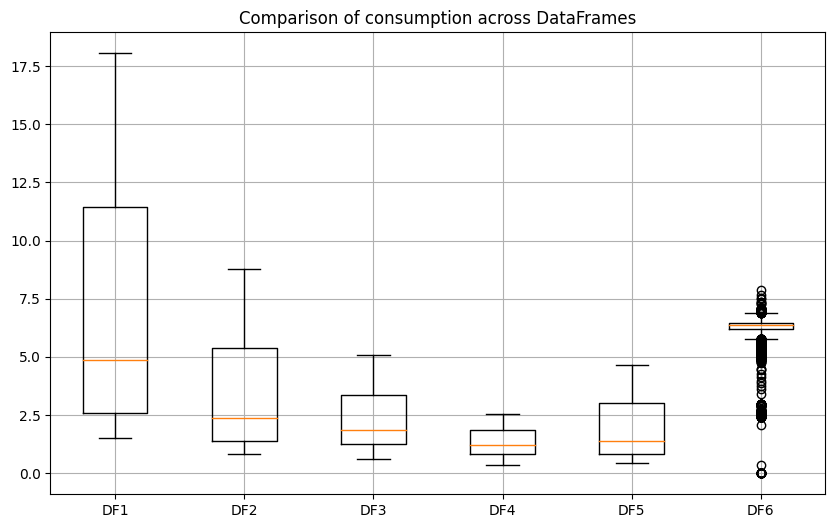

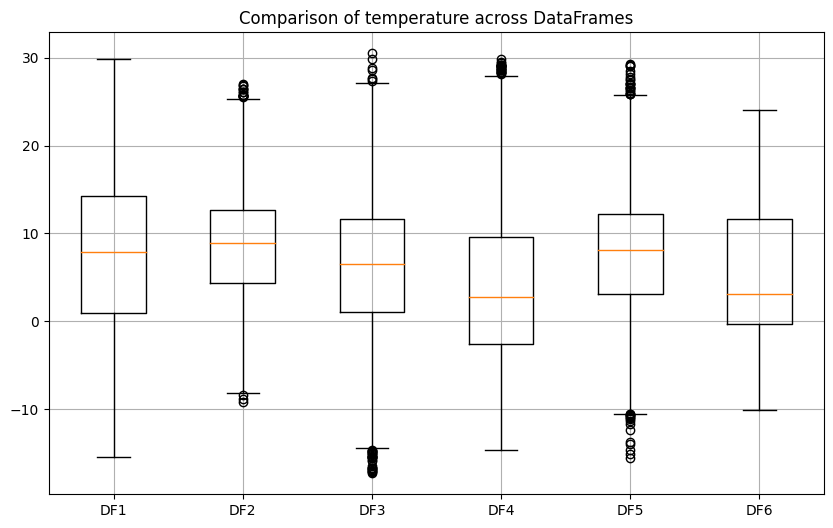

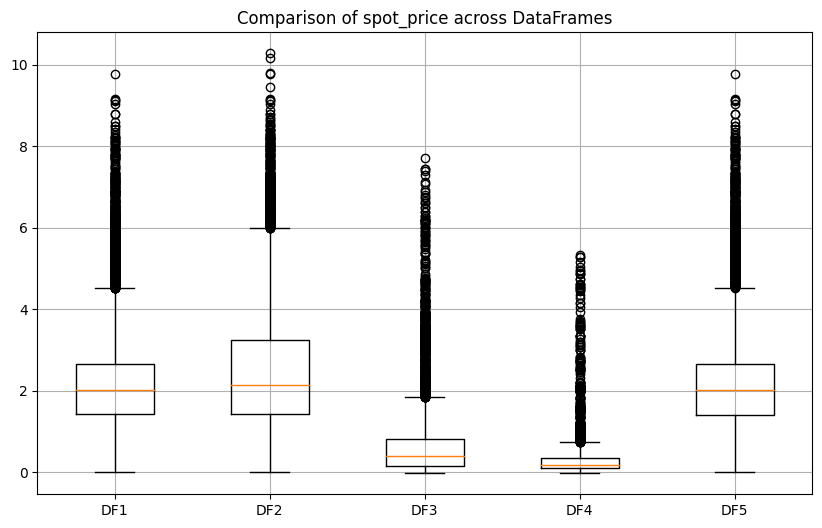

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_column_across_dfs(dfs, column_name):
    """
    Generate a box and whisker plot to compare a specific column across multiple DataFrames.

    Parameters:
    dfs (list of pd.DataFrame): List of DataFrames to compare.
    column_name (str): The name of the column to compare across the DataFrames.
    """
    data_to_plot = [df[column_name].dropna() for df in dfs if column_name in df.columns]

    # Check if data is available for plotting
    if not data_to_plot:
        print(f"No data available for column: {column_name}")
        return

    plt.figure(figsize=(10, 6))
    plt.boxplot(data_to_plot)
    plt.xticks(range(1, len(data_to_plot) + 1), [f'DF{i+1}' for i in range(len(data_to_plot))])
    plt.title(f'Comparison of {column_name} across DataFrames')
    plt.grid(True)
    plt.show()

compare_column_across_dfs(DFS, "consumption")
compare_column_across_dfs(DFS, "temperature")
compare_column_across_dfs(DFS[:-1], "spot_price")


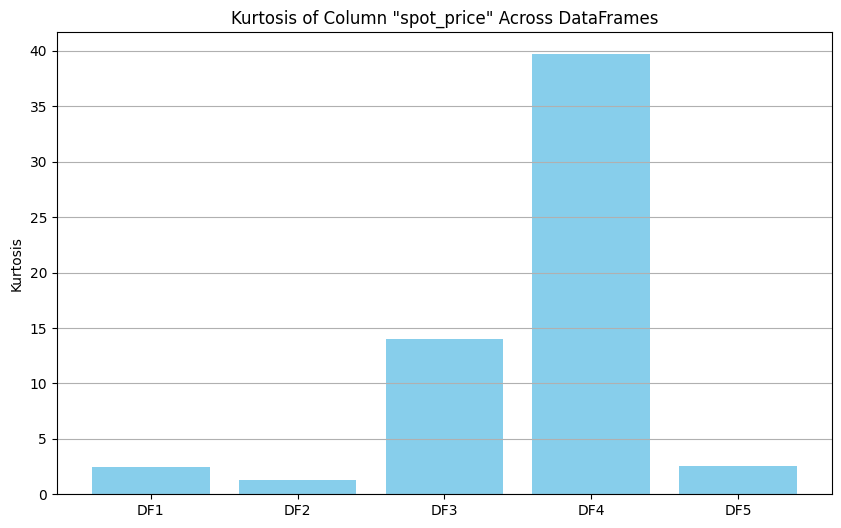

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_kurtosis_barchart(dfs, column_name):
    """
    Generate a bar chart showing the kurtosis for a given column across multiple DataFrames.

    Parameters:
    dfs (list of pd.DataFrame): List of DataFrames to compare.
    column_name (str): The name of the column for which to calculate kurtosis.
    """
    kurtosis_values = [df[column_name].kurtosis() for df in dfs if column_name in df.columns]

    # Check if data is available for plotting
    if not kurtosis_values:
        print(f"No data available for column: {column_name}")
        return

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(kurtosis_values)), kurtosis_values, color='skyblue')
    plt.xticks(range(len(kurtosis_values)), [f'DF{i+1}' for i in range(len(kurtosis_values))])
    plt.ylabel('Kurtosis')
    plt.title(f'Kurtosis of Column "{column_name}" Across DataFrames')
    plt.grid(axis='y')
    plt.show()

plot_kurtosis_barchart(DFS[:-1],"spot_price")